In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# Step 1: Generate Synthetic Data
# Feature: Experience level (years, from 0 to 10)
# Target: Time to complete a repair (hours), assumed to decrease with more experience plus noise

np.random.seed(42)  # For reproducibility

n_samples = 100
experience_level = np.random.uniform(0, 10, n_samples)  # Years of experience
# Assume time to complete repair decreases with experience (inverse relation)
time_to_complete = 10 - 0.8 * experience_level + np.random.normal(0, 1, n_samples)

# Step 2: Construct Design Matrix X and target vector y
X = experience_level.reshape(-1, 1)  # Feature matrix with shape (n_samples, 1)
y = time_to_complete                   # Target vector

# Step 3: Preprocess - Normalize feature to zero mean and unit variance
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Display some sample data
print("First 5 raw features (Experience level):\n", X[:5])
print("First 5 normalized features:\n", X_normalized[:5])
print("First 5 target values (Time to complete repair):\n", y[:5])

First 5 raw features (Experience level):
 [[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]]
First 5 normalized features:
 [[-0.32311215]
 [ 1.62343393]
 [ 0.88450935]
 [ 0.43404902]
 [-1.06136481]]
First 5 target values (Time to complete repair):
 [7.09072612 2.0952782  4.23580924 3.22316321 8.53217899]


In [3]:
# If needed, uncomment this line to install Faker in your environment
# !pip install faker

from faker import Faker
import numpy as np
import pandas as pd
import random

fake = Faker()
np.random.seed(42)
random.seed(42)

def generate_it_support_data(n=1000):
    data = []

    departments = ['Finance', 'HR', 'Engineering', 'Marketing', 'Sales']
    issue_types = ['Hardware Repair', 'Software Troubleshooting', 'Network Issue', 'Cybersecurity', 'Asset Deployment']
    experience_levels = ['Junior', 'Mid-Level', 'Senior']
    urgencies = ['High', 'Medium', 'Low']

    # Map experience level to numeric years for feature generation
    experience_years_map = {
        'Junior': (0, 2),
        'Mid-Level': (3, 6),
        'Senior': (7, 12)
    }

    for i in range(n):
        ticket_id = f"IT-{1000 + i}"
        department = random.choice(departments)
        issue_type = random.choice(issue_types)
        support_staff_experience = random.choice(experience_levels)
        
        # Generate experience years based on level
        exp_years = np.round(np.random.uniform(*experience_years_map[support_staff_experience]), 1)

        # Base time to complete varies by issue type (in hours)
        base_time = {
            'Hardware Repair': 3.0,
            'Software Troubleshooting': 2.0,
            'Network Issue': 4.0,
            'Cybersecurity': 5.0,
            'Asset Deployment': 1.5,
        }[issue_type]

        # More experience -> less time to complete (assumed linear reduction)
        time_to_complete = base_time * (1 - (exp_years / 15))  # max 15 years scaling
        time_to_complete += np.random.normal(0, 0.5)  # Add noise
        time_to_complete = max(0.5, round(time_to_complete, 2))

        # Urgency depending on issue type probability
        if issue_type == 'Cybersecurity':
            urgency = np.random.choice(urgencies, p=[0.6, 0.3, 0.1])
        else:
            urgency = np.random.choice(urgencies, p=[0.3, 0.5, 0.2])

        # Success rate modeled as inversely related to time and urgency
        urgency_factor = {'High': 1.1, 'Medium': 1.0, 'Low': 0.9}[urgency]
        success_rate = 70 + 20 * (exp_years / 12) - 10 * time_to_complete * urgency_factor + np.random.normal(0, 5)
        success_rate = max(0, min(100, round(success_rate, 2)))

        # Resolution time depends on urgency (hours)
        resolution_time = {
            'High': np.random.randint(1, 4),
            'Medium': np.random.randint(4, 8),
            'Low': np.random.randint(8, 16),
        }[urgency]

        # Ticket status logic based on success rate and resolution time
        if success_rate > 85 and resolution_time <= 4:
            ticket_status = np.random.choice(['Resolved', 'Escalated'], p=[0.9, 0.1])
        elif success_rate < 50:
            ticket_status = np.random.choice(['Resolved', 'Escalated'], p=[0.3, 0.7])
        else:
            ticket_status = np.random.choice(['Resolved', 'Escalated'], p=[0.7, 0.3])

        data.append({
            "Ticket ID": ticket_id,
            "Department": department,
            "Issue Type": issue_type,
            "Support Staff Experience Level": support_staff_experience,
            "Experience Years": exp_years,
            "Urgency Level": urgency,
            "Time to Complete Repair (hrs)": time_to_complete,
            "Success Rate (%)": success_rate,
            "Resolution Time (hrs)": resolution_time,
            "Ticket Status": ticket_status
        })

    return pd.DataFrame(data)

# Generate the dataset
df_it = generate_it_support_data(1000)

# Save to CSV
df_it.to_csv("reigner.csv", index=False)

# Show first few rows to verify
print(df_it.head())


  Ticket ID   Department                Issue Type  \
0   IT-1000      Finance           Hardware Repair   
1   IT-1001  Engineering  Software Troubleshooting   
2   IT-1002           HR           Hardware Repair   
3   IT-1003        Sales           Hardware Repair   
4   IT-1004    Marketing           Hardware Repair   

  Support Staff Experience Level  Experience Years Urgency Level  \
0                         Senior               8.9          High   
1                         Junior               0.3        Medium   
2                         Senior               7.9        Medium   
3                         Senior               7.2        Medium   
4                         Junior               0.3        Medium   

   Time to Complete Repair (hrs)  Success Rate (%)  Resolution Time (hrs)  \
0                           0.66             79.17                      3   
1                           1.72             54.12                      5   
2                           1.54   

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv("reigner.csv")  # Your CSV file name here

# Define the feature and target based on the adjusted dataset columns
X = df[["Time to Complete Repair (hrs)"]].values  # Feature column from your data
y = df["Success Rate (%)"].values  # Target column from your data

print(df.head())  # Optional: print first 5 rows to verify loading

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the feature
X_normalized = scaler.fit_transform(X)

# Print the first 5 normalized values
print("Normalized Feature (X):", X_normalized[:5])

# Optional: print the first 5 original feature and target values
# print("Feature (X):", X[:5])
# print("Target (y):", y[:5])


  Ticket ID   Department                Issue Type  \
0   IT-1000      Finance           Hardware Repair   
1   IT-1001  Engineering  Software Troubleshooting   
2   IT-1002           HR           Hardware Repair   
3   IT-1003        Sales           Hardware Repair   
4   IT-1004    Marketing           Hardware Repair   

  Support Staff Experience Level  Experience Years Urgency Level  \
0                         Senior               8.9          High   
1                         Junior               0.3        Medium   
2                         Senior               7.9        Medium   
3                         Senior               7.2        Medium   
4                         Junior               0.3        Medium   

   Time to Complete Repair (hrs)  Success Rate (%)  Resolution Time (hrs)  \
0                           0.66             79.17                      3   
1                           1.72             54.12                      5   
2                           1.54   

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_csv("reigner.csv")  # Your updated CSV filename

# Feature and target columns updated to your dataset
X = df[["Time to Complete Repair (hrs)"]].values
y = df["Success Rate (%)"].values

# Normalize X
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Define prediction function (simple linear model)
def predict(X, w, b):
    return w * X + b

# Cost functions
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Test parameter pairs
params_list = [(1.5, 0.5), (2.0, 1.0), (1.0, 0.0)]

# Calculate and display results
for w, b in params_list:
    y_pred = predict(X_normalized, w, b).flatten()
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    print(f"w = {w}, b = {b} => MSE = {mse:.4f}, MAE = {mae:.4f}")
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_csv("reigner.csv")  # Your updated CSV filename

# Feature and target columns updated to your dataset
X = df[["Time to Complete Repair (hrs)"]].values
y = df["Success Rate (%)"].values

# Normalize X
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Define prediction function (simple linear model)
def predict(X, w, b):
    return w * X + b

# Cost functions
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Test parameter pairs
params_list = [(1.5, 0.5), (2.0, 1.0), (1.0, 0.0)]

# Calculate and display results
for w, b in params_list:
    y_pred = predict(X_normalized, w, b).flatten()
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    print(f"w = {w}, b = {b} => MSE = {mse:.4f}, MAE = {mae:.4f}")

w = 1.5, b = 0.5 => MSE = 3616.2061, MAE = 57.0388
w = 2.0, b = 1.0 => MSE = 3577.3470, MAE = 56.5428
w = 1.0, b = 0.0 => MSE = 3656.0653, MAE = 57.5386
w = 1.5, b = 0.5 => MSE = 3616.2061, MAE = 57.0388
w = 2.0, b = 1.0 => MSE = 3577.3470, MAE = 56.5428
w = 1.0, b = 0.0 => MSE = 3656.0653, MAE = 57.5386


   Time_to_Complete_Repair  Normalized_Time_to_Complete_Repair  Success_Rate
0                     0.66                           -1.140003         79.17
1                     1.72                           -0.268560         54.12
2                     1.54                           -0.416541         58.20
3                     1.67                           -0.309666         61.46
4                     2.64                            0.487786         42.64
Optimized weight (w): -14.0337
Optimized bias (b): 49.9078
Final MSE: 115.6702


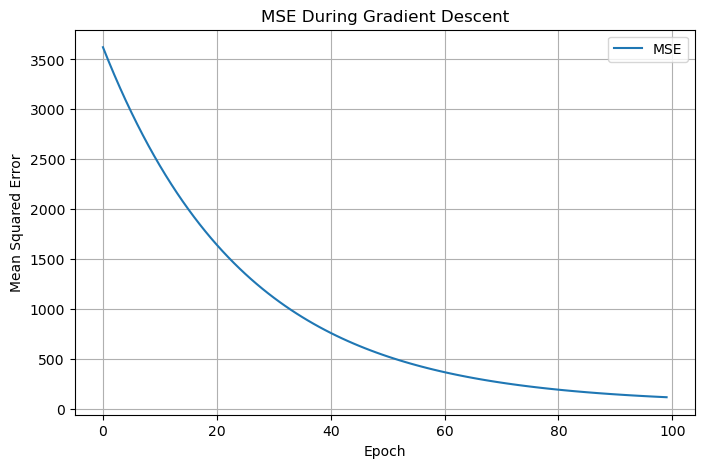

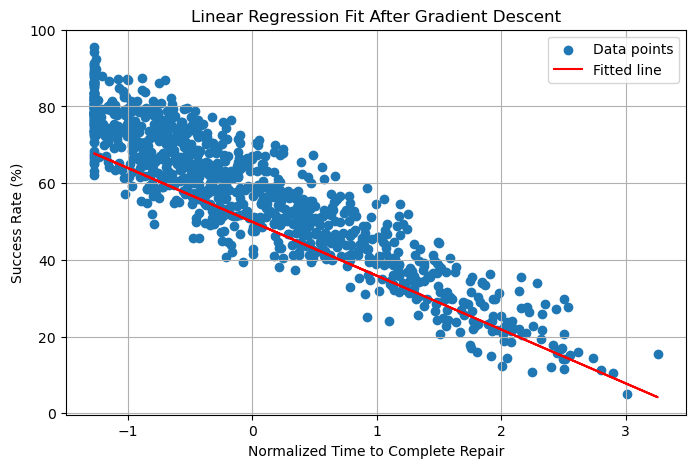

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load Real Data from CSV
df = pd.read_csv("reigner.csv")

# Extract feature and target
X = df[["Time to Complete Repair (hrs)"]].values.flatten()  # Feature vector
y = df["Success Rate (%)"].values                           # Target vector

# Step 2: Normalize the Feature
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X.reshape(-1, 1)).flatten()  # Flatten for calculations

# Optional: Combine into DataFrame for viewing
df_view = pd.DataFrame({
    'Time_to_Complete_Repair': X,
    'Normalized_Time_to_Complete_Repair': X_normalized,
    'Success_Rate': y
})
print(df_view.head())

# ----------------------------
# Activity 3: Gradient Descent
# ----------------------------

# Initialize parameters
w = 0.0
b = 0.0
learning_rate = 0.01
epochs = 100
m = len(X_normalized)
mse_history = []

for epoch in range(epochs):
    # Predict
    y_pred = w * X_normalized + b

    # Calculate error
    error = y_pred - y

    # Calculate MSE
    mse = np.mean(error ** 2)
    mse_history.append(mse)

    # Compute gradients
    dw = (2/m) * np.dot(error, X_normalized)
    db = (2/m) * np.sum(error)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

# Results
print(f"Optimized weight (w): {w:.4f}")
print(f"Optimized bias (b): {b:.4f}")
print(f"Final MSE: {mse_history[-1]:.4f}")

# Plot MSE over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), mse_history, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE During Gradient Descent')
plt.grid(True)
plt.legend()
plt.show()

# Plot fitted line with data points
plt.figure(figsize=(8, 5))
plt.scatter(X_normalized, y, label='Data points')
plt.plot(X_normalized, w * X_normalized + b, color='red', label='Fitted line')
plt.xlabel('Normalized Time to Complete Repair')
plt.ylabel('Success Rate (%)')
plt.title('Linear Regression Fit After Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


Trained parameters: w = -14.2372, b = 49.9800
Test MSE: 113.9804
Test MAE: 8.7228


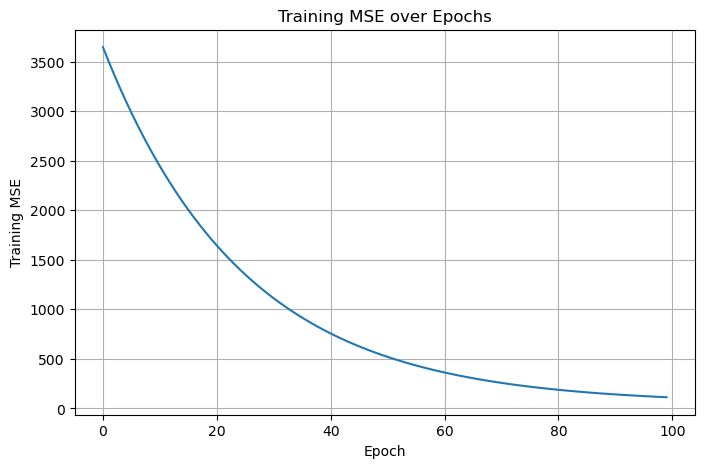

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load your real dataset
df = pd.read_csv("reigner.csv")

# Select feature and target
X = df[["Time to Complete Repair (hrs)"]].values.reshape(-1, 1)
y = df["Success Rate (%)"].values

# Normalize feature
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X).flatten()

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

m_train = len(X_train)
m_test = len(X_test)

# Initialize parameters
w = 0.0
b = 0.0
learning_rate = 0.01
epochs = 100
mse_history = []

# Gradient descent training loop
for epoch in range(epochs):
    y_pred_train = w * X_train + b
    error_train = y_pred_train - y_train
    mse = np.mean(error_train ** 2)
    mse_history.append(mse)

    # Compute gradients
    dw = (2/m_train) * np.dot(error_train, X_train)
    db = (2/m_train) * np.sum(error_train)

    # Update weights
    w -= learning_rate * dw
    b -= learning_rate * db

# Evaluate on test set
y_pred_test = w * X_test + b
test_errors = y_pred_test - y_test

# MSE and MAE on test
mse_test = np.mean(test_errors ** 2)
mae_test = np.mean(np.abs(test_errors))

print(f"Trained parameters: w = {w:.4f}, b = {b:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test MAE: {mae_test:.4f}")

# Plot MSE over training epochs
plt.figure(figsize=(8,5))
plt.plot(range(epochs), mse_history)
plt.xlabel('Epoch')
plt.ylabel('Training MSE')
plt.title('Training MSE over Epochs')
plt.grid(True)
plt.show()